 # Computer Infrastructure - FAANG Analysis Assignment

This assignment is an analysis of the famous 5 FAANG companies hourly stock data across the most recent 5 day period. The FAANG companies are among the largest techoligical companies in the world & have historically made up a significant % weighting of the Market Capitalisation of the  S&P 500 in the early 2020s. ([CNBC, 2020](https://www.cnbc.com/2020/01/13/five-biggest-stocks-dwarfing-the-market-at-unprecedented-level.html)).
 
Facebook (META)  
Apple (AAPL)  
Amazon (AMZN)  
Netflix (NFLX)  
Google (GOOG)   

The goal of the assigment is to demonstrate tools learned in the module, such as using python tools to collect,analyse,visulise, and schedule automation of a workflow, stock data prices in this example.
The assignement is divided into four problems, briefly summarised below. Each will be explored in more detail throughout the notebook.

1. **Data Collection - Download & save stock data**
Using the yfinance python module, we download the market data, store it in a csv file with a timestamped naming convention.

2. **Data Visulisation - Plotting stock data**
Show a plot with the closing prices of each stock & save in a png file.

3. **Script Creation - Create a script to automate the download/saving/plotting of stock data**
We will create a python script that runs the problems 1 & 2 automatically - downlaoding the latest data &showing plot of said data.

4. **Workflow Automation - Automate the script using Github Actions**
Use GitHub Actions workflow to automate running the script weekly every Saturday morning.

**Notebook Structure**  
  
Notebook structure follows below format:

- 1. Libraries Imported  
- 2. Problems 1-4  presented in this format.
    - a)*Task* - A Markdown cell describing the objectives of the Problem, as defined in the assignemnt.  
    - b)*Description* - A Markdown cell providing commentary and interpretation of the results from the code cell.  
    - c)*Code Cell* - A Python code cell containing the code used for the Task.  
- Closing Summary   - Summarise the earlier problems
  



 **Import Modules**

In [1]:
# Libraries Imported

# Dates & Times. https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Fcomputer%2Dinfrastructure%2F22%2Ddatetime%2Emkv&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2Eca70c99c%2D5d51%2D4c6a%2D8743%2D670d34da45a7
import datetime as dt

# Data frames
import pandas as pd

# Yahoo finance data.
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt

# Folder creation + listing files
import os


## Problem 1: Data from yfinance - Task

Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:  

Facebook (META)  
Apple (AAPL)  
Amazon (AMZN)  
Netflix (NFLX)  
Google (GOOG)  

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

# Problem 1: Data from yfinance  – Description

To start we import the libaries we need in order to comple the assignement. We will be importing the python library yfinance which we will use to download the prices of the five FAANG stocks.

Yfinance is used to access financial data from Yahoo finance and is an open-source tool that utilizes Yahoo's publicaly available APIs. 
It can be used to access multiple facets of financial data such as Historical Market Data, Corportate Actions. Financial Statements, Meta Data and stock tickers that track the share price & movements of stock.
Reference: https://www.geeksforgeeks.org/machine-learning/what-is-yfinance-library/

We will use it in this assignment to download the tickers of the five FAANG stocks, accessing the hourly data of the stocks across the last five business days.







# Problem 1: Data from yfinance  – Code Cell

In [3]:
# https://ranaroussi.github.io/yfinance/

#tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

### Problem 1

**Step 1:
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:**

We create a function called **get_data()** that uses **yfinance.download** to return the stock price data that correlates to our five FAANG companies (META, AAPL, AMZN, NFLX, and GOOG).
The parameter **period=5d** donwloads data from the previous 5 business days while **interval="1h"** returns hourly pricing data.
In the function, the data is stored in a dataframe called **df**.
We call the function then using **get_data()** which will show the pricing information across our selected period.

In [ ]:
 # Set up the function 'get_data()' that can be called for hourly prices of FAANG stocks over the last 5 days
def get_data(): 
    df = yf.download("META AAPL AMZN NFLX GOOG", period="5d",interval="1h")

    now = dt.datetime.now()             #Ref. - https://docs.python.org/3/library/datetime.html
    now.strftime("%Y%m%d-%H:%M:%S")     #Format date & time for current date & time above as a string -  'now' 
                                        ## Ref. format codes - https://docs.python.org/3/library/datetime.html#format-codes
                                        
    # Create folder called 'data'                  https://www.geeksforgeeks.org/python/python-os-makedirs-method/
    os.makedirs('./data', exist_ok=True)           # exist_ok=True - means when code re-ran no handling error will appear as folder exists - add as markdown cell

    # File Name - Save to data folder # cOMMENT oCT 19TH - nEED TO ADD LOCATION OF folder where file will save
    filename = "data/" + now.strftime("%Y%m%d-%H%M%S")+ ".csv"

# Save timestamped csv to data folder
    df.to_csv(filename)

    return df

# References:
# Python functions - https://www.w3schools.com/python/python_functions.asp
# Yfinance Download -  https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

 
 # Call the function
df = get_data()

/tmp/ipykernel_2464/1817428208.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("META AAPL AMZN NFLX GOOG", period="5d",interval="1h")
[*********************100%***********************]  5 of 5 completed


### Problem 1

From the above output - **5 of 5 completed**, we can see stock data has been successfully returned.
We can view the first five rows using **df.head()**, which allows us to see the structure of the data, such as dates & column names.

We can see our five FAANG stocks are shown and their corresponding **Close, High, Open & Volume** for each hour. This gives an overview of the prices & trading activity across the hourly period.



In [5]:
# Display the data frame
df.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-08 14:30:00+00:00  277.559998  229.039993  317.950012  668.773499   
2025-12-08 15:30:00+00:00  277.459991  228.070007  315.869385  669.838013   
2025-12-08 16:30:00+00:00  277.230011  227.279907  313.019989  669.429993   
2025-12-08 17:30:00+00:00  276.970001  227.050003  312.832397  667.859985   
2025-12-08 18:30:00+00:00  276.359985  227.089996  313.609985  666.484985   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-08 14:30:00+00:00  95.825302  279.669312  230.824005  321.230011   
2025-12-08 15:30:00+00:00  95.925003  277.880005  229.313507  317.899994   
2025-12-08 16:30:00+00:00  96.112000  277.819000  228.389999  316.160004   
2025-12-08 17:30:00+00:00  95.660004  277.849915  227.770004  313.989990   
2025-12-08 18:30:00+00:00  96.315002  276.949493  227.373993  314.269897   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-08 14:30:00+00:00  676.710022  99.820000  ...  278.168488  229.520004   
2025-12-08 15:30:00+00:00  670.770020  96.570000  ...  277.549988  229.029999   
2025-12-08 16:30:00+00:00  670.900024  96.529999  ...  277.470001  228.039001   
2025-12-08 17:30:00+00:00  670.209900  96.239998  ...  277.209991  227.270004   
2025-12-08 18:30:00+00:00  668.359924  96.504997  ...  276.949493  227.020004   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-08 14:30:00+00:00  320.880005  669.684998  99.790001  6285926   
2025-12-08 15:30:00+00:00  317.899994  668.700012  95.820000  3326326   
2025-12-08 16:30:00+00:00  315.820099  669.880005  95.930000  1896481   
2025-12-08 17:30:00+00:00  313.043610  669.429993  96.120003  1999024   
2025-12-08 18:30:00+00:00  312.859985  667.750000  95.650002  1825108   

Price                                                           
Ticker                        AMZN     GOOG     META      NFLX  
Datetime                                                        
2025-12-08 14:30:00+00:00  5237392  3758988  2929014  18330581  
2025-12-08 15:30:00+00:00  2886442  2078465  1062264  12653429  
2025-12-08 16:30:00+00:00  2070338  2665657   690379   7657343  
2025-12-08 17:30:00+00:00  2032964  1384447   569351   5494339  
2025-12-08 18:30:00+00:00  2086023  1098322   542845   6449408  

[5 rows x 25 columns]

### Problem 1
**step 3 :
save the file down in CSV format using the naming convention
format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds.**

We will now save the file using the naming format YYYYMMDD-HHmmss.csv.
Initially, we will use the **datetime** library imported as **import datetime as dt** & the function **dt.datetime.now()** to find the current date & time - this value will update each time the code is ran. We will store this in a variable called **'now'**. 

**now** is returned in the format **YYYY-MM-DD HH:MM:SS.microseconds**, ww will need to amend for our desired filename.

We will then format the variable **'now'** to a string using **strftime()** ,using the format **now.strftime("%Y%m%d-%H:%M:%S")**

- %Y → 4-digit year (e.g., 2025)
- %m → 2-digit month (e.g.,12)
- %d → 2-digit day of the month (e.g.,13)
- %H → 2-digit hour (e.g.,17)
- %M → 2-digit minute (e.g.,02)
- %S → 2-digit second (e.g.,44)

The above example returns: **20251213-17:02:44**

This gives us string using the naming convention **YYYYMMDD-HHmmss** , we will then link this format to the naming convention on the csv file for our FAANG data, we will this in a folder called **'data'**.


The **datetime module** has many formatting options that allow us to manipulate how dates & times are represented. This is important when saving  csv files, as a specific naming convention may be required. In business context, this is useful when automatcailly feeding data to third party vendors that may expect files to follow a strict naming structure. An example of this would be a fund administration company feeding the latest pricing information of a fund direct to the Bloomberg Terminal - Bloomberg terminal is a financial platform that stores real time market data & is widley used in the financial community see ([Bloomberg Terminal, Bloomberg L.P., 2024](https://www.bloomberg.com/professional/solution/bloomberg-terminal/)). It allows current & prospective investors to track the price movements against similar funds and a benchmark return.


### Problem 1
See above - **now.strftime("%Y%m%d-%H:%M:%S")** is returning the date format we require so we will now link this to the naming convention on the csv file.
The repository already contains a data folder but we can make sure this exists (create if it doesn't) by using: 

```python
os.makedirs('./data', exist_ok=True)

```

The **os** module was imported initially.We use **os.makedirs**  to create directories and the parameter **exist_ok=True** prevents an error if the folder exists.

We will use a variable **filename** to store the location we want our csv to save - inclduing the **data** folder & the formatted timestamp naming convention.
Finally, we use df.to_csv(filename) to create the csv.


## Problem 2: Plotting Data

**Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.**

We create a function called **plot_data()** that reasds in the csv file we created in Problem 1 in the data folder

uses **yfinance.download** to return the stock price data that correlates to our five FAANG companies (META, AAPL, AMZN, NFLX, and GOOG).
The parameter **period=5d** donwloads data from the previous 5 business days while **interval="1h"** returns hourly pricing data.
In the function, the data is stored in a dataframe called **df**.
We call the function then using **get_data()** which will show the pricing information across our selected period.

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html



In [ ]:
#Call plot

#df.plot()
# Check columns so we can see what we are working with & columns required
df.columns


MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

# Save plot to file (Lecture 29-30) Lecture 31 to follow - matching csv file to plot

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html


Markdown comments expand on
doc for savefig , explain how it is used
Explain each line itesm of code in markdown cell in more info



In [ ]:
# combined in function call
# List the files in the Data Folder
data_files = os.listdir('./data/')

#Show
data_files

['20251129-21:05:37.csv',
 '20251213-10:14:09.csv',
 '20251130-13:37:37.csv',
 '20251129-20:23:03.csv',
 '20251122-14:30:06.csv',
 '20251130-13:38:27.csv',
 '20251206-17:20:18.csv',
 '20251212-20:31:41.csv',
 '20251130-13:35:31.csv',
 '20251122-14:29:45.csv',
 '20251129-11:17:53.csv',
 '20251206-17:22:59.csv',
 '20251122-14:29:20.csv',
 '20251130-13:25:29.csv',
 '20251129-14:00:37.csv',
 '20251129-20:30:12.csv',
 '20251129-19:42:10.csv',
 '20251129-20:37:40.csv',
 '20251122-13:25:33.csv']

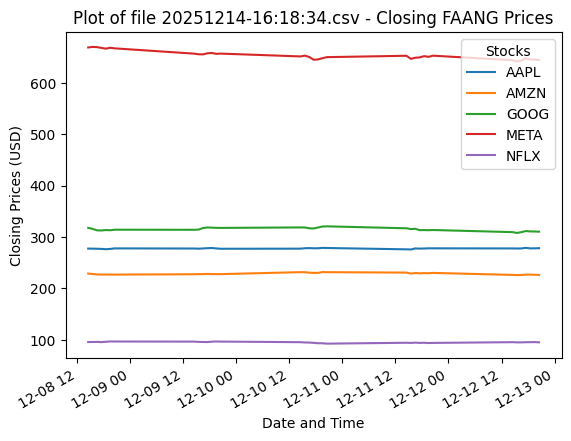

In [9]:
# Combined code for funtionality to get data, save & plot

def plot_data(): 
    data_files = os.listdir('./data/')          # List files in data folder
    data_files.sort(reverse=True)
    df = pd.read_csv(f'data/{data_files[0]}',header=[0,1],index_col=0,parse_dates=True) # lecture 33 - 

    closing_prices = df['Close']

    #Creat new figure and axis
    fig, ax = plt.subplots()

# Plot closing prices
    closing_prices.plot(ax=ax)

# Labels xlabel and ylabel
    ax.set_xlabel("Date and Time")
    ax.set_ylabel("Closing Prices (USD)")

# Show current date & time                                        #Ref. - https://docs.python.org/3/library/datetime.html
    now = dt.datetime.now()

    # Create folder called 'plots'                  https://www.geeksforgeeks.org/python/python-os-makedirs-method/
    os.makedirs('./plots', exist_ok=True)           # exist_ok=True - means when code re-ran no handling error will appear as folder exists - add as markdown cell

# File Name
    filename = "./plots/" + now.strftime("%Y%m%d-%H%M%S")+ ".png"

#Title
    ax.set_title(f"Plot of file {data_files[0]} - Closing FAANG Prices" )

#Legend
    ax.legend(title="Stocks", loc="best")    # loc options ref = https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html


# Save figure in plots folder
    fig.savefig(filename, dpi=300)    # dpi ref = https://stackoverflow.com/questions/39870642/how-to-plot-a-high-resolution-graph
    plt.show()
# Call the function
plot_data()

File Listings - Lecture 31

https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
https://docs.python.org/3/library/os.html#os.listdir

## Problem 3: Script

Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook

Added a shebang line
#! /usr/bin/env python  

so that we could run the python code without stating python prior to running  **NOTE 15th Nov: Add comparison table of before and after this step**
faang.py was not exucatable so we used chmod u+x faang.py to allow the file to be executed, previously was read only access
ls -l to check if file execuatbele or just rw
be creful that we instruct on command line to look to current folder as does not auto pick up ./faang.py as an example

In [16]:
# lecture 33 - can delete as not necesarily required but better for reading file in csv
df = pd.read_csv(f'Data/{data_files[0]}',header=[0,1],index_col=0,parse_dates=True)
#Show df
df

# mULTICOLUMN INDEX back from yfinance, currently only using 1st row
# Remove multi index - ref. https://stackoverflow.com/questions/20208320/how-to-remove-multiindex-in-pandas-dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

# header infer means firs

FileNotFoundError: [Errno 2] No such file or directory: 'Data/20251213-10:14:09.csv'

In [ ]:
#Lecture 33 - look at row index
df.index

DatetimeIndex(['2025-11-21 14:30:00+00:00', '2025-11-21 15:30:00+00:00',
               '2025-11-21 16:30:00+00:00', '2025-11-21 17:30:00+00:00',
               '2025-11-21 18:30:00+00:00', '2025-11-21 19:30:00+00:00',
               '2025-11-21 20:30:00+00:00', '2025-11-24 14:30:00+00:00',
               '2025-11-24 15:30:00+00:00', '2025-11-24 16:30:00+00:00',
               '2025-11-24 17:30:00+00:00', '2025-11-24 18:30:00+00:00',
               '2025-11-24 19:30:00+00:00', '2025-11-24 20:30:00+00:00',
               '2025-11-25 14:30:00+00:00', '2025-11-25 15:30:00+00:00',
               '2025-11-25 16:30:00+00:00', '2025-11-25 17:30:00+00:00',
               '2025-11-25 18:30:00+00:00', '2025-11-25 19:30:00+00:00',
               '2025-11-25 20:30:00+00:00', '2025-11-26 14:30:00+00:00',
               '2025-11-26 15:30:00+00:00', '2025-11-26 16:30:00+00:00',
               '2025-11-26 17:30:00+00:00', '2025-11-26 18:30:00+00:00',
               '2025-11-26 19:30:00+00:00', '2025-1

## Problem 4: Automation

Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

Lecture 34 - 

To automate the execution of the script, we need to set up GitHub Actions by creating:

1. A directory named .github/workflows/  
2. A workflow file inside the directory called faang.yml

Background Information:

**GitHub Actions** is a CI/CD (Continuous Integration and Continuous Delivery) system that lets you automate tasks such as building, testing, and running scripts. Workflows run automatically in response to events—like pushing code to the repository—or on a defined schedule, for example,  as in this case running the FAANG code every Saturday morning.  
**Reference**: GitHub Actions Docs – https://docs.github.com/en/actions

More information can be found in the GitHub Actions quickstart guide:
https://docs.github.com/en/actions/get-started/quickstart

**YML or YAML** -  YAML stands for YAML Ain't Markup Language, but it originally stood for Yet Another Markup Language - is human readable data serialization language that is similar to JSON and XML files.Serialization is a process where one application or service that has different data structures and is written in a different set of technologies can transfer data to another application using a standard format.
Serialization is about translating, converting, and wrapping up a data structure in another format.
The data in the new format can be stored in a file or transmitted to another application or service over a network.
YAML is a widely used format for writing configuration files for different DevOps tools, programs, and applications because of its human-readable and intuitive syntax.  
**Reference**: Freecodecamp - what is YAML – https://www.freecodecamp.org/news/what-is-yaml-the-yml-file-format/


Steps:



Once the workflow file is created, we add the required YAML configuration code into faang.yml.




Lecture 37 - Manually run file addition
https://docs.github.com/en/actions/how-tos/manage-workflow-runs/manually-run-a-workflow

  # Conclusion

 ## End